In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir('D:\\Education\\Extra\Machine Learning\\Coding File\\4 - Feature Engineering\\8 - Missing Data\\35 - Complete Case Analysis')

In [7]:
df = pd.read_csv('data_science_job.csv')

In [ ]:
df.head()

(5, 13)

In [10]:
df.shape

(19158, 13)

In [13]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [14]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [15]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
11498,0.920,no_enrollment,High School,6.0,NaN
6026,0.924,no_enrollment,High School,11.0,54.0
15171,0.939,no_enrollment,Graduate,6.0,52.0
16489,0.920,no_enrollment,Graduate,20.0,15.0
1780,0.924,no_enrollment,Masters,17.0,41.0


In [16]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [17]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [18]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

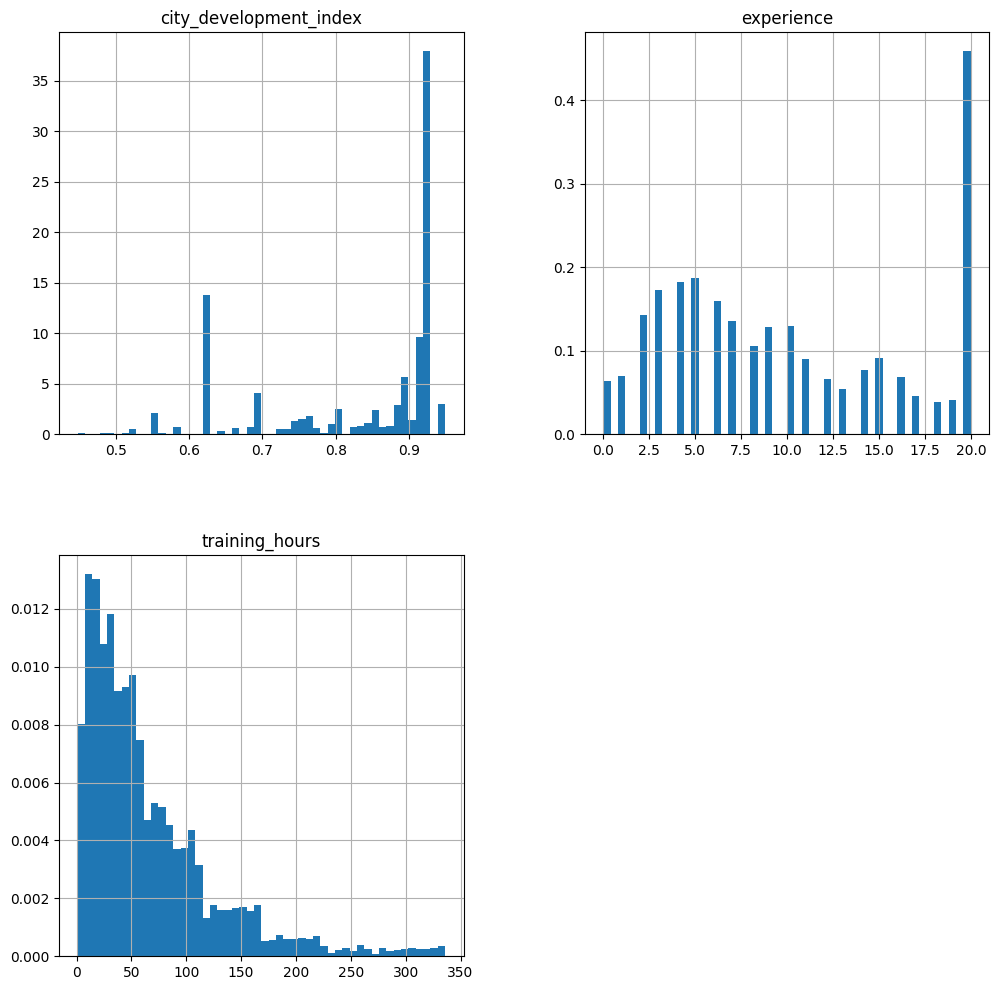

In [20]:
new_df.hist(bins=50,density = True,figsize=(12,12))
plt.show()

<Axes: >

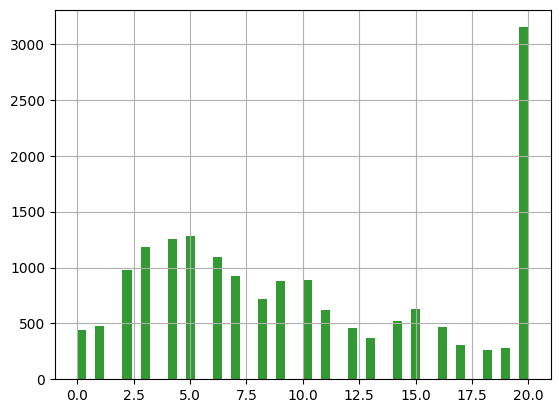

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].hist(bins=50,ax = ax,density = True,color = 'red')
new_df['experience'].hist(bins=50,ax = ax,color = 'green',alpha = 0.8)

<Axes: ylabel='Density'>

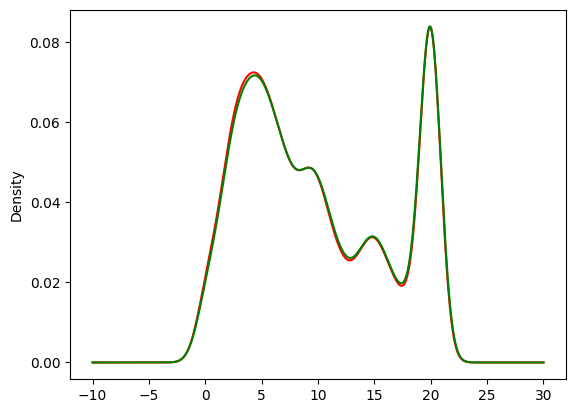

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [30]:
temp = pd.concat([df['education_level'].value_counts()/len(df),new_df['education_level'].value_counts()/len(df)],axis=1)
temp.columns = ['Original','CCA']
temp


,Original,CCA
education_level,,
Graduate,0.605387,0.555904
Masters,0.227633,0.209938
High School,0.105282,0.096304
Phd,0.021610,0.019835
Primary School,0.016077,0.014876
